In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.drop(['Cabin', 'Embarked', 'PassengerId'], axis=1, inplace=True)

In [6]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Ticket    418 non-null    object 
 8   Fare      417 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [8]:
df['Age']=df['Age'].astype(float)

In [9]:
df['Fare']=df['Fare'].astype(float)

In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.0,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.0,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.0,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.0,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.0,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.5,512.3292


In [12]:
df['Age'].mean()

30.272590361445783

In [13]:
df["Age"].fillna(df['Age'].mean(),inplace=True)

In [14]:
df[(df['Sex']=='female')&(df["Survived"]==1)].head(50)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875
6,1,3,"Connolly, Miss. Kate",female,30.00000,0,0,330972,7.6292
8,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00000,0,0,2657,7.2292
12,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.00000,1,0,21228,82.2667
14,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.00000,1,0,W.E.P. 5734,61.1750
15,1,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.00000,1,0,SC/PARIS 2167,27.7208
18,1,3,"Ilmakangas, Miss. Ida Livija",female,27.00000,1,0,STON/O2. 3101270,7.9250
19,1,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.00000,0,0,2696,7.2250
22,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,30.27259,0,0,PC 17598,31.6833


In [15]:
df[(df['Sex']=='male')&(df["Survived"]==1)].head(50)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare


In [16]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
dtype: int64

In [17]:
df['Fare'].fillna(df['Fare'].mean(),inplace = True)

In [18]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

<Axes: >

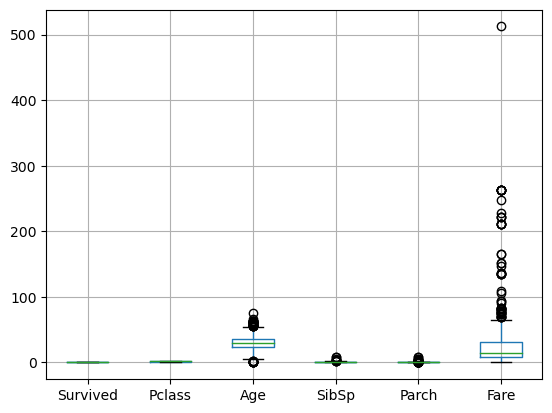

In [19]:
df.boxplot()

In [21]:
survival_rate = df['Survived'].count()
print(survival_rate)

418


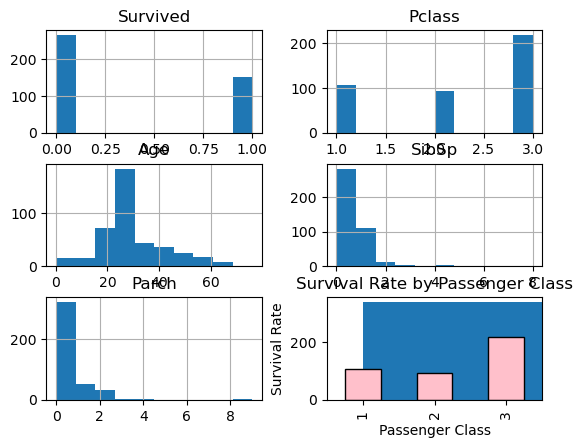

Pclass
1    107
2     93
3    218
Name: Survived, dtype: int64


In [22]:
import matplotlib.pyplot as plt
survival_by_class = df.groupby('Pclass')['Survived'].count()
survival_by_class.plot(kind='bar',color='pink',edgecolor='black')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
print(survival_by_class)


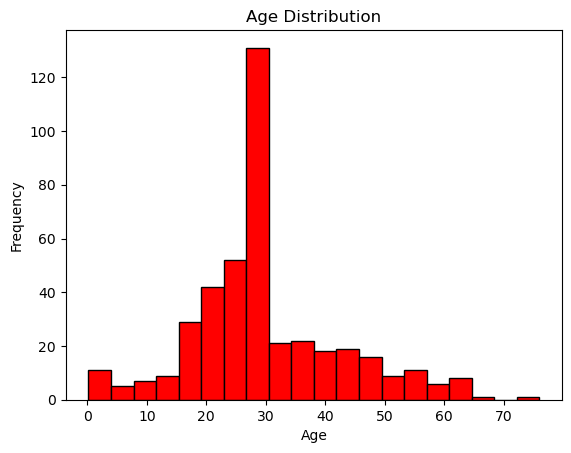

In [23]:
plt.hist(df['Age'],bins=20,color='red',edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

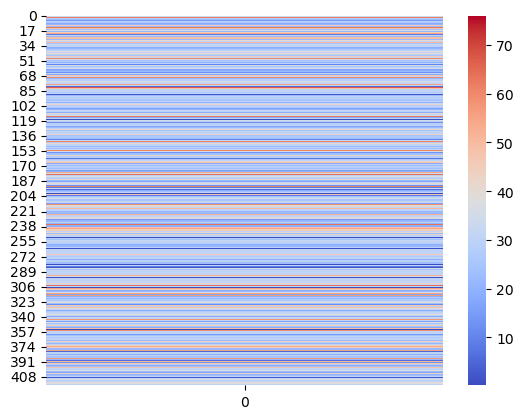

In [24]:
import seaborn as sns
Age_2d = df['Age'].values.reshape(-1, 1)

sns.heatmap(Age_2d, cmap='coolwarm')
plt.show()

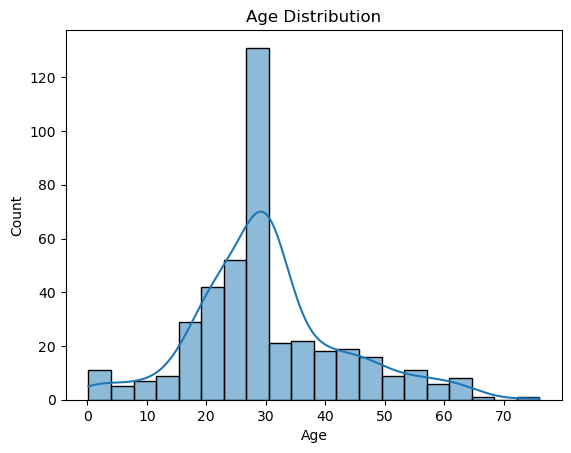

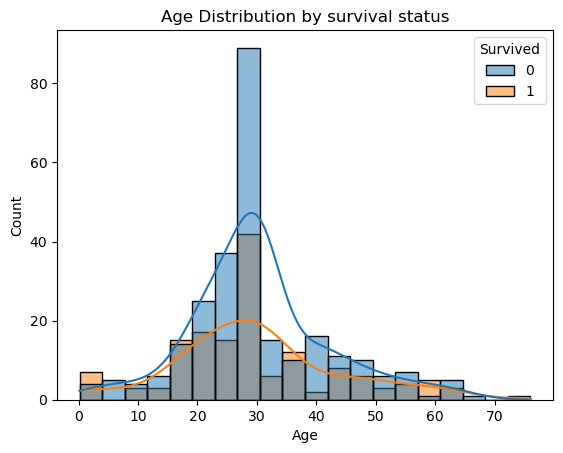

In [25]:
sns.histplot(df['Age'].dropna(),bins=20,kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(x='Age',hue='Survived',data=df,bins=20,kde=True)
plt.title('Age Distribution by survival status')
plt.show()

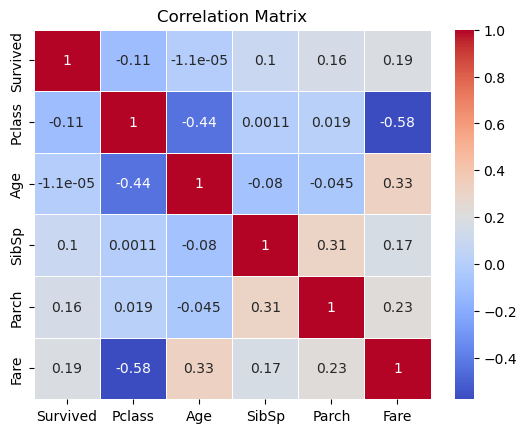

In [26]:
numeric_columns = df.select_dtypes(include=['float64','int64']).columns

correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


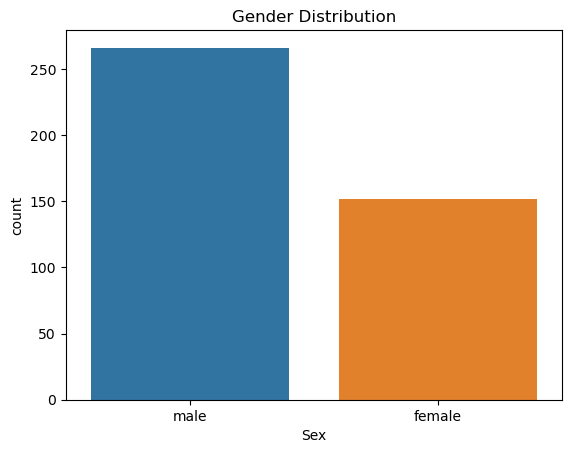

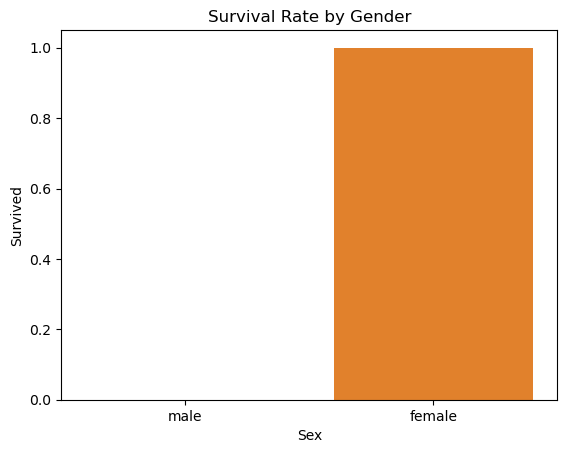

In [27]:
sns.countplot(x='Sex',data=df)
plt.title('Gender Distribution')
plt.show()

sns.barplot(x='Sex',y='Survived',data=df)
plt.title('Survival Rate by Gender')
plt.show()